<a href="https://colab.research.google.com/github/KushalChakraborty1995/Ted-Talk-Prediction/blob/main/Copy_of_Ted_Talk_Views_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Ted Talk Views Prediction



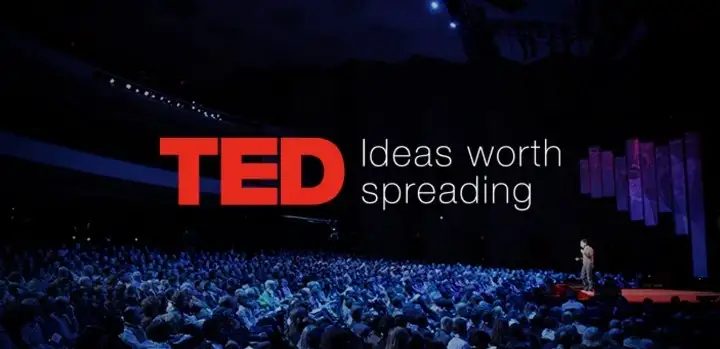



**Project Type**    - **Regression**
##### **Contribution**    - **Individual**
##### **Team Member 1 -**Kushal Chakraborty    
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**


TED stands for Technology, Entertainment and Design.

TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages.

Founded in 1984 by Richard Salman as a nonprofit organization that aimed at bringing experts from the fields of Technology, Entertainment, and Design together.

TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates.

Our main objective is to build a predictive model to predict the number of views for the respective videos from the TEDx website. As we have a continous variable to predict, we use regression models to predict the views of the TED talks.

# **GitHub Link -**

https://github.com/KushalChakraborty1995/Ted-Talk-Prediction

# **Problem Statement**


Our objective is to predict the views of a TED talk uploaded on the TEDx website. For this purpose; we have been provided with the following attributes which are to be used to predict the views on a particular video.

1-- Information about the Speakers

2-- Underlying topics of the video’s talk

3-- Type of Event in which the video was recorded

4-- Recorded and Published Date of the video

5-- Native language of the video and languages in which video is available

6-- Comments, Duration and web-address of the video
Related talks

7-- Description and Transcript of the video

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from datetime import datetime
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
import time
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble

import warnings
warnings.filterwarnings("ignore")


### Dataset Loading

In [ ]:
# Load Dataset
# mount drive
from google.colab import drive
drive.mount('/content/drive')




In [ ]:
df=pd.read_csv('/content/data_ted_talks.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()



* There are only 3 numerical columns in the dataset out of which 1 is target variable and 2 can be used as features and rest all columns are categorical columns.
* main goal here is to find or generate some numerical columns from these columns. 



#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum().sort_values(ascending=False)

In [ ]:
# Visualizing the missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.rcParams['figure.figsize'] = (20, 8)

### What did you know about your dataset?

The dataset contains NaN values in few columns like:



*   all_speakers
*   occupations
*   about_speakers
*   comments
*   recorded_date









## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe()

### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

list(df['title'].unique())

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
#Dropping Url column
df = df.drop(columns=['url'])

In [ ]:
#Replacing Null Values
df['occupations'].fillna('Not Present',inplace = True)
df['all_speakers'].fillna('No Speaker',inplace = True)
df['about_speakers'].fillna('Not Present',inplace = True)
df['comments'].fillna('No Comments',inplace = True)
df['recorded_date'].fillna('Not Present',inplace = True)

### What all manipulations have you done and insights you found?

 **Dropped the Url columns,as it had no use.
Cleaned the data and replaced the null values.So there no more null values.**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Chart - 1

Who are the speakers of top 5 most watched TED talks?

In [ ]:
popular_df = df.nlargest(5, ['views'])
popular_df[['speaker_1','views','title']]

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(10,6))
plt.title("Speaker's of most popular videos")
sns.barplot(x='speaker_1', y='views', data=popular_df)

##### 1. Why did you pick the specific chart?

Because i wanted to check the speakers of top 5 most watched TED talks.

##### 2. What is/are the insight(s) found from the chart?

1--Sir Ken Robinson's talk on "Do Schools Kill Creativity?" is the most popular TED Talk with more than 65 million views.

2--There is only one talk that has crossed 60 million mark while 3 talks have crossed 50 million mark.Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain positive business impact.


#### Chart - 2

Who is the most popular speaker?

In [ ]:
popular_speaker_df = df.groupby('speaker_1').agg({'views':'sum'}).nlargest(10,['views']).reset_index()
popular_speaker_df

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(15,6))
plt.title('Most popular Speaker according to total views')
sns.barplot(x='speaker_1', y='views', data=popular_speaker_df,palette='Paired')

##### 1. Why did you pick the specific chart?

Because i wanted to check who is the most popular speaker.

##### 2. What is/are the insight(s) found from the chart?

Alex Gendler is the most popular speaker followed by Sir Ken Robinson and James veitch.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain positive business impact.



#### Chart - 3

which is the most frequent and most popular event in TED?

In [ ]:
#most_frequent_event
popular_event_df = df.groupby('event').agg({'views':'sum'}).nlargest(10,['views']).reset_index()
popular_event_df

In [ ]:
#find most popular event
pop_event_df=df[['event','views']].groupby('event').agg({'views' : 'sum'}).nlargest(10,['views']).reset_index()
pop_event_df

In [ ]:
# Chart - 3 visualization code
# Plotting both graphs
#setting x and y values in the plot
x = popular_event_df['event']
y = popular_event_df['views']
x1 = pop_event_df['event']
y1 = pop_event_df['views']

plt.subplots(figsize=(20, 7))
 
# using subplot function and creating plot one
plt.subplot(1, 2, 1)
plt.bar(x, y, color='red')
plt.title('most frequent event')
plt.xlabel('event')
plt.ylabel('views')
 
# using subplot function and creating plot two
plt.subplot(1, 2, 2)
plt.bar(x1, y1,color='pink')
plt.title('most popular event')
plt.xlabel('event')
plt.ylabel('views')
# space between the plots
plt.tight_layout(2)
 
# show plot
plt.show()

##### 1. Why did you pick the specific chart?

Because i wanted to check most frequent and popular shows on TED.

##### 2. What is/are the insight(s) found from the chart?

TED-Ed is the most popular and frequent event

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain positive business impact.

#### Chart - 4

Which is most common native language show?

In [ ]:
df.native_lang.value_counts()

In [ ]:
# Chart - 4 visualization code
plt.title('Native language')
sns.countplot(df['native_lang'],color='blue')

##### 1. Why did you pick the specific chart?



To check which is the common language on TED shows.

##### 2. What is/are the insight(s) found from the chart?

Here, approx 99% values in native_lang column is english.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain positive business impact.

#### Chart - 5

Which is  the most frequent words in the title?

In [ ]:
#importing the wordcloud
from wordcloud import WordCloud,ImageColorGenerator

In [ ]:
# Chart - 5 visualization code
#making of word cloud from title column
text = " ".join(topic for topic in df.title.astype(str))
print ("There are {} words in the combination of all titles.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="pink", width=800, height=400).generate(text)

plt.axis("off")
plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

##### 1. Why did you pick the specific chart?

To check which words are most used in the title. 

##### 2. What is/are the insight(s) found from the chart?

Majority of Titles contains words like life, world, make, new, future, art.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain positive business impact.



#### Chart - 6

Which is the most popular title with respect to views?

In [ ]:
# Chart - 6 visualization code
popular_title = df[['title','views']].groupby('title').agg({'views' : 'mean'}).reset_index().sort_values(by=['views'],ascending=False).head(15)
plt.rcParams["figure.figsize"] = (14,5)
sns.barplot(x='views',y='title',data=popular_title,palette='Spectral')

##### 1. Why did you pick the specific chart?

To find the most popular title with respect to views.

##### 2. What is/are the insight(s) found from the chart?

Most popular title is "Do schools kill creativity?" with 60+ million views.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain positive business impact.



#### Chart - 7

Extracting day,month and year from published_date column



In [ ]:
#applying strptime on published_date column
import datetime
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d"))

#extracting release day, month and year from the published date column
df['published_date_day'] = df['published_date'].apply(lambda x: x.weekday())
df['published_date_month']=df['published_date'].apply(lambda x: x.month)
df['published_date_year'] = df['published_date'].apply(lambda x: x.year)

In [ ]:
#encoding of published_date_day column with corresponding week day name
week_day={0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df['published_date_day']=df['published_date_day'].map(week_day)

In [ ]:
# Chart - 7 visualization code
#checking the day of the month having maximum release date 
freq_rel_day=df[['published_date_day','views']].groupby('published_date_day').agg({'views' : 'count'})
freq_rel_day=freq_rel_day.sort_values('views',ascending=False)
freq_rel_day.reset_index(inplace=True)

# Plotting the graph
fig, ax = plt.subplots(figsize=(10,6), dpi= 80)
ax.vlines(x=freq_rel_day.index, ymin=0, ymax=freq_rel_day.views, color='firebrick', alpha=0.7, linewidth=3)
ax.scatter(x=freq_rel_day.index, y=freq_rel_day.views, s=40, color='firebrick', alpha=1)
ax.set_xticks(freq_rel_day.index)
ax.set_xticklabels(freq_rel_day.published_date_day.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
plt.title("Most frequent release days",fontsize=15)
# Printing the count in graph
for row in freq_rel_day.itertuples():
    ax.text(row.Index, row.views+.5, s=round(row.views, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=10)
# Show the object
plt.xlabel('Weekdays')
plt.ylabel('views')
plt.show()

##### 1. Why did you pick the specific chart?


To find the most frequent release date.

##### 2. What is/are the insight(s) found from the chart?


Most frequent releases are on Tuesday.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain positive business impact.

#### Chart - 8

Which is the best release day of the week with respect to average views?

In [ ]:
# Chart - 8 visualization code

#checking popular release day wrt views
pop_rel_day=df[['published_date_day','views']].groupby('published_date_day').agg({'views' : 'mean'})
pop_rel_day=pop_rel_day.sort_values('views',ascending=False)
pop_rel_day.reset_index(inplace=True)

# Plotting the graph
fig, ax = plt.subplots(figsize=(10,6), dpi= 80)
ax.vlines(x=pop_rel_day.index, ymin=0, ymax=pop_rel_day.views, color='red', alpha=0.7, linewidth=3)
ax.scatter(x=pop_rel_day.index, y=pop_rel_day.views, s=40, color='firebrick', alpha=1)
ax.set_xticks(pop_rel_day.index)
ax.set_xticklabels(pop_rel_day.published_date_day.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
plt.title("week days having maximum views",fontsize=15)
plt.xlabel('Weekdays')
plt.ylabel('views')

##### 1. Why did you pick the specific chart?

To find the best release day of the week with respect to average views.

##### 2. What is/are the insight(s) found from the chart?

1--Most videos are published on Tuesday followed by Thursday.

2--But the videos published on Friday are more popular (i.e. have more average views) followed by wednesday.

3--Friday release is impacting the views of the video

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain positive business impact.

#### Chart - 9

Which month has max releases?

In [ ]:
#checking months having maximum release 
freq_rel_month=df[['published_date_month','views']].groupby('published_date_month').agg({'views' : 'count'})
freq_rel_month=freq_rel_month.sort_values('views',ascending=False)
freq_rel_month.reset_index(inplace=True)
freq_rel_month

In [ ]:
#Printing the most popular release month according to average Views
pop_rel_month=df[['published_date_month','views']].groupby('published_date_month').agg({'views' : 'mean'})
pop_rel_month=pop_rel_month.sort_values('views',ascending=False)
pop_rel_month.reset_index(inplace=True)
pop_rel_month

In [ ]:
# Chart - 9 visualization code
# plotting the months having maximum release 
plt.subplots(figsize=(20, 7))
plt.subplot(1,2,1)
sns.set_theme(style="darkgrid")
sns.lineplot(x='published_date_month',y='views',data=freq_rel_month)
plt.title('Most frequent release months')

#plotting most popular release month according to average Views
plt.subplot(1,2,2)
plt.title('Released months having maximum average views')
sns.lineplot(x='published_date_month',y='views',data=pop_rel_month)
plt.show()


##### 1. Why did you pick the specific chart?

To find which month has maximum releases and which month has maximum average views.

##### 2. What is/are the insight(s) found from the chart?

April have maximum released videos, But the videos released in March are more popular

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain positive business impact.



#### Chart - 10

Which years have maximum releases? 

In [ ]:
df['release_year'] = df['published_date'].apply(lambda x: x.year)

In [ ]:
freq_rel_year=df[['release_year','views']].groupby('release_year').agg({'views' : 'count'})
freq_rel_year=freq_rel_year.sort_values('views',ascending=False)
freq_rel_year.reset_index(inplace=True)

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize=(10,4))
sns.barplot(x='release_year',y='views',data=freq_rel_year, order=freq_rel_year.sort_values('views',ascending = False).release_year)
plt.title('Most frequent release years')

##### 1. Why did you pick the specific chart?

To check which is the most frequent release year.

##### 2. What is/are the insight(s) found from the chart?

Most videos are published in 2019 followed by 2018 and 2017.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain positive business impact.

#### Chart - 11

Which is the most popular release years according to average views?

In [ ]:
pop_rel_year=df[['release_year','views']].groupby('release_year').agg({'views' : 'mean'})
pop_rel_year=pop_rel_year.sort_values('views',ascending=False)
pop_rel_year.reset_index(inplace=True)


In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(10,5))
plt.title('Released years having maximum average views')
sns.barplot(x='release_year',y='views', data=pop_rel_year, order=pop_rel_year.sort_values('views',ascending =False).release_year)

##### 1. Why did you pick the specific chart?

To find the most popular release years according to average views.

##### 2. What is/are the insight(s) found from the chart?

The videos published in 2006 are most viewed followed by 2013 and 2015.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes.It will help to gain positive business impact.

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.heatmap(df.corr(),annot=True, cmap='Spectral_r')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

#### What all missing value imputation techniques have you used and why did you use those techniques?

I have alreday dealt with null values and replaced them with values.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# checking Outliers using boxplot
columns = ['views', 'duration',]
n = 1
plt.figure(figsize=(18,12))

for i in columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()
     

In [ ]:
#Treatment of outliers by mean
for i in columns:
  iqr =  df[i].quantile(0.75)-df[i].quantile(0.25)
  df[i]= df[i].mask(df[i]>(df[i].quantile(0.75)+1.5*iqr), df[i].mean())


In [ ]:
#Numerical column again after treating outliers
n = 1
plt.figure(figsize=(18,12))

for i in columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.boxplot(df[i])
  plt.title(i)
  plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

We observe that Outliers are present in views,comments and duration which needs to be treated. We are replacing the outliers with the mean values and talk_id is id of speakers so we can't have its's data as outliers.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
X=pd.get_dummies(df)

In [ ]:
X.shape

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***